# **EDA-6**

In [1]:
import pandas as pd
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

#### 导入reviews数据

In [3]:
all_reviews = pd.read_csv('/content/drive/My Drive/BT4222_Project/cleaned_senti_reviews.csv')

In [13]:
all_reviews = all_reviews.drop('Unnamed: 0', axis=1)

#### 将date转为datetime数据后，分离成年月日

In [14]:
all_reviews['date'] = pd.to_datetime(all_reviews['date'])

In [15]:
all_reviews['year'] = all_reviews['date'].dt.year
all_reviews['month'] = all_reviews['date'].dt.month
all_reviews['day'] = all_reviews['date'].dt.day

In [16]:
all_reviews.head()

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,polarity_score,sentiment,year,month,day
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,I am a private tutor by profession. My husband...,within a few hours,100%,f,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Woodlands,North Region,1.44255,103.79580,Apartment,Private room,1,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$81.00,180,360,180,180,360,360,180.0,360.0,58 months ago,30,60,90,365,1,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,2,0.02,0.9615,pos,2013,10,21
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9484,pos,2014,4,18
2,15222393,50646,2014-06-05,Welli,Stayed over at Sujatha's house for 3 good nigh...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9879,pos,2014,6,5
3,5543172,50646,2014-07-02,Cyril,It's been a lovely stay at Sujatha's. The room...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9627,pos,2014,7,2
4,817532,50646,2014-07-08,Jake,"We had a great experience. A nice place, an am...",Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,

#### 分析每月评论总数量

In [17]:
all_reviews.month.value_counts().sort_index()

1     12984
2     10428
3      9788
4      9524
5      9489
6      9833
7     11900
8     11532
9     11548
10    10688
11    10448
12    12471
Name: month, dtype: int64

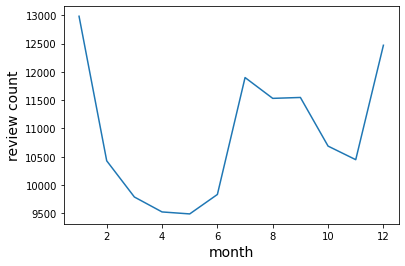

In [20]:
plt.plot(all_reviews.month.value_counts().sort_index())
plt.xlabel('month', fontsize=14)
plt.ylabel('review count', fontsize=14)
plt.show()

#### 分析2011-2020年每个月评论的数量

In [21]:
all_reviews["year_month"] = pd.to_datetime(all_reviews["year"].astype(str)+"-"+all_reviews["month"].astype(str)).dt.to_period('M')

In [22]:
all_reviews.head()

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,polarity_score,sentiment,year,month,day,year_month
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,I am a private tutor by profession. My husband...,within a few hours,100%,f,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Woodlands,North Region,1.44255,103.79580,Apartment,Private room,1,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$81.00,180,360,180,180,360,360,180.0,360.0,58 months ago,30,60,90,365,1,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,2,0.02,0.9615,pos,2013,10,21,2013-10
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9484,pos,2014,4,18,2014-04
2,15222393,50646,2014-06-05,Welli,Stayed over at Sujatha's house for 3 good nigh...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9879,pos,2014,6,5,2014-06
3,5543172,50646,2014-07-02,Cyril,It's been a lovely stay at Sujatha's. The room...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730,730,90.0,730.0,55 months ago,30,60,90,365,18,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9627,pos,2014,7,2,2014-07
4,817532,50646,2014-07-08,Jake,"We had a great experience. A nice place, an am...",Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,"I am a working professional, living in Singapo...",NaN,NaN,f,Bukit Timah,"['email', 'phone', 'facebook', 'reviews']",t,f,Bukit Timah,Central Region,1.33235,103.78521,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,90,730,90,90,730

In [23]:
all_reviews.year_month.value_counts().sort_index()

2011-05      2
2011-06      2
2011-07      4
2011-08      4
2011-09      5
          ... 
2020-09    472
2020-10    373
2020-11    401
2020-12    558
2021-01    310
Freq: M, Name: year_month, Length: 117, dtype: int64

In [24]:
reviews = all_reviews.year_month.value_counts().sort_index().tolist()

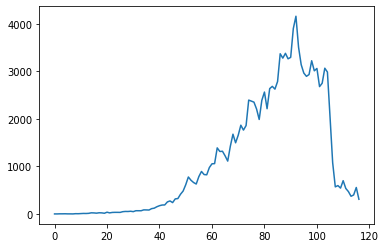

In [25]:
plt.plot(reviews)

<BarContainer object of 117 artists>

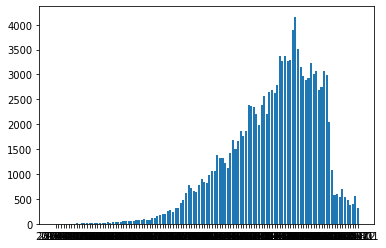

In [26]:
col = pd.unique(all_reviews.year_month.astype(str))
plt.bar(col,reviews)

<BarContainer object of 11 artists>

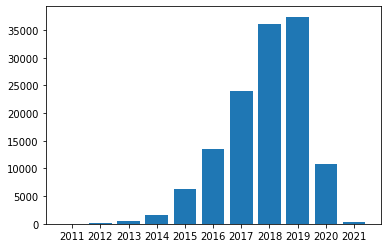

In [27]:
years = pd.unique(all_reviews.year.astype(str))
years.sort()
plt.bar(years,all_reviews.year.value_counts().sort_index())

In [28]:
def counter(df, date):
  # df = pd.read_csv(path)
  yr = int(date[:4])
  mon = int(date[-2:])
  # print(year*100+month)
  df['date'] = pd.to_datetime(df['date'])
  df['year'] = df['date'].dt.year
  df['month'] = df['date'].dt.month
  df['day'] = df['date'].dt.day
  target = df[(df['year']==yr) & (df['month']==mon)]
  return target.shape[0]

In [29]:
dates = ['2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
         '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-10', '2020-11', '2020-12']

In [30]:
reviews = []
path = '/content/drive/My Drive/data/data/'

In [31]:
for date in dates:
  review = pd.read_csv(path+date+'/reviews.csv')
  reviews.append(counter(review,date))
print(reviews)

[1399, 1521, 2263, 2480, 1996, 3206, 2682, 2385, 2514, 2861, 2797, 2124, 901, 493, 512, 330, 314, 337, 521]


<BarContainer object of 19 artists>

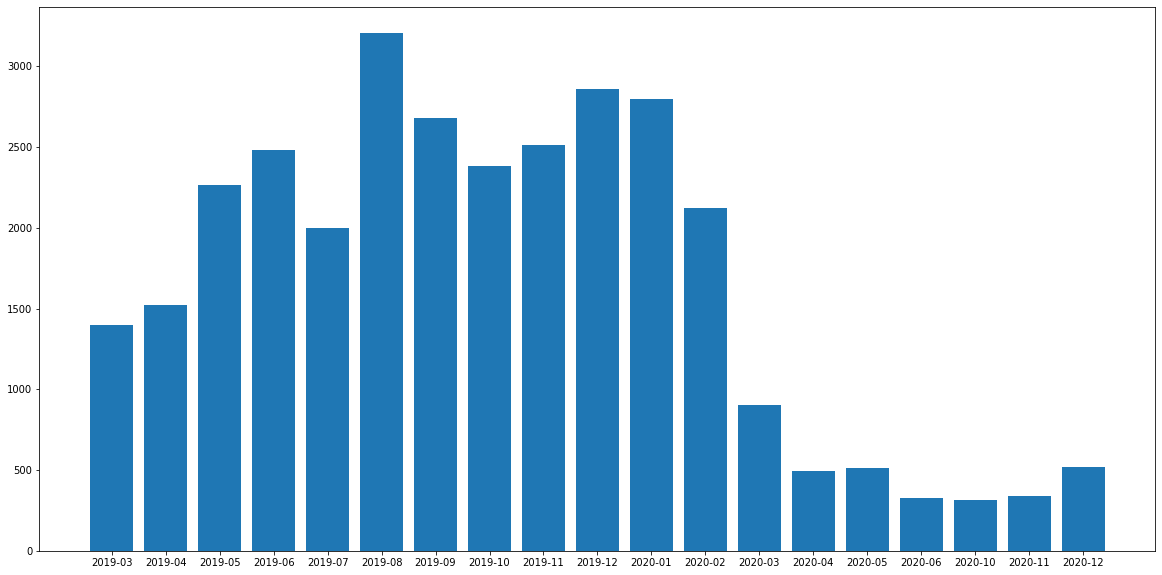

In [32]:
plt.figure(figsize=(20,10))
plt.bar(dates, reviews)